# Installing Libraries

In [2]:
pip install pandas

  Using cached pandas-1.3.4-cp38-cp38-win_amd64.whl (10.2 MB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

  Using cached matplotlib-3.4.3-cp38-cp38-win_amd64.whl (7.1 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)
  Using cached Pillow-8.4.0-cp38-cp38-win_amd64.whl (3.2 MB)



In [40]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nltk

  Using cached nltk-3.6.5-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Using cached click-8.0.3-py3-none-any.whl (97 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn

  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)



In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Garlapati.Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Garlapati.Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Garlapati.Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Garlapati.Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
df=pd.read_excel("C:\\Users\\Garlapati.Varun\\Downloads\\Manas\\New_Mentalhealth.xlsx")

In [5]:
df

types  \
0                Stress/Anxiety   
1     Substance Abuse/Addiction   
2                      Marriage   
3                Stress/Anxiety   
4      Relationship Dissolution   
...                         ...   
1266             Stress/Anxiety   
1267            Family Conflict   
1268           Workplace issues   
1269            Family Conflict   
1270                Self-esteem   

                                             complaints  Commnet  
0         How do I overcome my anxierty and depression?      NaN  
1     How can I rebuild the trust I destroyed from m...      NaN  
2     I'm going through depression right now and my ...      NaN  
3     How do I talk to my girlfriend about my anxiet...      NaN  
4          My fiancÃ©'s ex-husband shows up unannounced      NaN  
...                                                 ...      ...  
1266                  Anxiety about the passage of time      NaN  
1267  My parents are both refusing any Covid vaccine...      NaN  
1268     What to do about a boss that cannot stop lying      NaN  
1269  How do I (21F) stop my parents (50F & 51M) fro...      NaN  
1270  (20F)My boyfriend(27M) has a very low self-est...      NaN  

[1271 rows x 3 columns]

In [6]:
df=df.drop_duplicates(subset='complaints', keep='last')
df

types  \
0               Stress/Anxiety   
2                     Marriage   
3               Stress/Anxiety   
4     Relationship Dissolution   
5            Behavioral Change   
...                        ...   
1266            Stress/Anxiety   
1267           Family Conflict   
1268          Workplace issues   
1269           Family Conflict   
1270               Self-esteem   

                                             complaints  Commnet  
0         How do I overcome my anxierty and depression?      NaN  
2     I'm going through depression right now and my ...      NaN  
3     How do I talk to my girlfriend about my anxiet...      NaN  
4          My fiancÃ©'s ex-husband shows up unannounced      NaN  
5       How do I stop sneaking away from home at night?      NaN  
...                                                 ...      ...  
1266                  Anxiety about the passage of time      NaN  
1267  My parents are both refusing any Covid vaccine...      NaN  
1268     What to do about a boss that cannot stop lying      NaN  
1269  How do I (21F) stop my parents (50F & 51M) fro...      NaN  
1270  (20F)My boyfriend(27M) has a very low self-est...      NaN  

[1209 rows x 3 columns]

In [7]:
df['types'].value_counts()

Relationships                186
Stress/Anxiety                97
Depression                    91
Intimacy                      80
Social Relationships          75
Family Conflict               72
Anger Management              70
Trauma/Grief/Loss             69
LGBTQ                         55
Parenting                     54
Marriage                      50
Substance Abuse/Addiction     50
Sleep Improvement             50
Self-esteem                   49
Workplace issues              49
Behavioral Change             42
Relationship Dissolution      37
Counseling Fundamentals       33
Name: types, dtype: int64

# Data Visualization

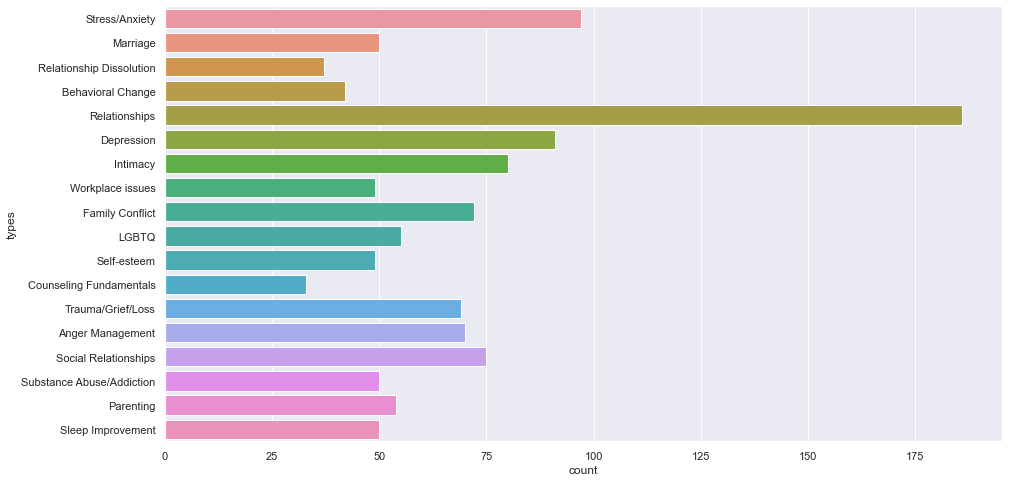

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="types", data=df)

# Text Preprocessing 

In [8]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import FreqDist, pos_tag
from nltk.corpus import wordnet
import string
stop_words = list(stopwords.words('english'))

stop_words.extend(["ex","husband","wife","girl","boy","n't",'thank','get','please','san','diego','hi','hello','im','wa','ha','ive','would','like','know','also','let',
                   '2020','name','one','yet','june','said','two','aug','oct','jan','dec','july','-','january','april','robert','etc','nov','mesa','brown','andrew','jean','kim'])

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
def pre_pro_x(a):
    a = str(a).lower()
    a = re.sub('[0-9]+',' ',a) 
    #removing punctuations
    a = a.replace('[^\w\s]', '')
    a = a.replace('\d+', '')
    #tokenization and lemmatization
    lemmatizer = WordNetLemmatizer()
    a = [lemmatizer.lemmatize(item,get_wordnet_pos(item)) for item in word_tokenize(a) 
                          if item not in stop_words]
    a = [i for i in a if len(i)>2]                     
    a = ' '.join(a)
    #X = X.apply(lambda x: lemmatize(x))
    #X = X.apply(lambda x: ' '.join([str(st)[str(st).index("'")+1:str(st).index('/')] for st in x]))
    return a

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Garlapati.Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Garlapati.Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
df['cleanmsg']= df['complaints'].apply(pre_pro_x)
df

C:\Users\GARLAP~1.VAR\AppData\Local\Temp/ipykernel_13224/1348237288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanmsg']= df['complaints'].apply(pre_pro_x)


types  \
0               Stress/Anxiety   
2                     Marriage   
3               Stress/Anxiety   
4     Relationship Dissolution   
5            Behavioral Change   
...                        ...   
1266            Stress/Anxiety   
1267           Family Conflict   
1268          Workplace issues   
1269           Family Conflict   
1270               Self-esteem   

                                             complaints  Commnet  \
0         How do I overcome my anxierty and depression?      NaN   
2     I'm going through depression right now and my ...      NaN   
3     How do I talk to my girlfriend about my anxiet...      NaN   
4          My fiancÃ©'s ex-husband shows up unannounced      NaN   
5       How do I stop sneaking away from home at night?      NaN   
...                                                 ...      ...   
1266                  Anxiety about the passage of time      NaN   
1267  My parents are both refusing any Covid vaccine...      NaN   
1268     What to do about a boss that cannot stop lying      NaN   
1269  How do I (21F) stop my parents (50F & 51M) fro...      NaN   
1270  (20F)My boyfriend(27M) has a very low self-est...      NaN   

                                               cleanmsg  
0                          overcome anxierty depression  
2                  depression right relationship suffer  
3                               talk girlfriend anxiety  
4                   fiancã© ex-husband show unannounced  
5                            stop sneak away home night  
...                                                 ...  
1266                               anxiety passage time  
1267  parent refuse covid vaccine wildly different r...  
1268                                       bos stop lie  
1269                      stop parent comment eat habit  
1270                          boyfriend low self-esteem  

[1209 rows x 4 columns]

In [104]:
df.to_csv("Cleanedmh.csv")

# Label Encoding Categories

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['topic_encoding'] = labelencoder.fit_transform(df['types'])
df

C:\Users\GARLAP~1.VAR\AppData\Local\Temp/ipykernel_13224/50257439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_encoding'] = labelencoder.fit_transform(df['types'])


types  \
0               Stress/Anxiety   
2                     Marriage   
3               Stress/Anxiety   
4     Relationship Dissolution   
5            Behavioral Change   
...                        ...   
1266            Stress/Anxiety   
1267           Family Conflict   
1268          Workplace issues   
1269           Family Conflict   
1270               Self-esteem   

                                             complaints  Commnet  \
0         How do I overcome my anxierty and depression?      NaN   
2     I'm going through depression right now and my ...      NaN   
3     How do I talk to my girlfriend about my anxiet...      NaN   
4          My fiancÃ©'s ex-husband shows up unannounced      NaN   
5       How do I stop sneaking away from home at night?      NaN   
...                                                 ...      ...   
1266                  Anxiety about the passage of time      NaN   
1267  My parents are both refusing any Covid vaccine...      NaN   
1268     What to do about a boss that cannot stop lying      NaN   
1269  How do I (21F) stop my parents (50F & 51M) fro...      NaN   
1270  (20F)My boyfriend(27M) has a very low self-est...      NaN   

                                               cleanmsg  topic_encoding  
0                          overcome anxierty depression              14  
2                  depression right relationship suffer               7  
3                               talk girlfriend anxiety              14  
4                   fiancã© ex-husband show unannounced               9  
5                            stop sneak away home night               1  
...                                                 ...             ...  
1266                               anxiety passage time              14  
1267  parent refuse covid vaccine wildly different r...               4  
1268                                       bos stop lie              17  
1269                      stop parent comment eat habit               4  
1270                          boyfriend low self-esteem              11  

[1209 rows x 5 columns]

In [11]:
print(labelencoder.classes_)

['Anger Management' 'Behavioral Change' 'Counseling Fundamentals'
 'Depression' 'Family Conflict' 'Intimacy' 'LGBTQ' 'Marriage' 'Parenting'
 'Relationship Dissolution' 'Relationships' 'Self-esteem'
 'Sleep Improvement' 'Social Relationships' 'Stress/Anxiety'
 'Substance Abuse/Addiction' 'Trauma/Grief/Loss' 'Workplace issues']


In [11]:
df['topic_encoding'].nunique()

18

# Feature Extraction Using TF-IDF

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df["cleanmsg"],df["topic_encoding"], test_size = 0.33, random_state = 42)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer    
count_vect = CountVectorizer(ngram_range=(1,3))               #set it to ngram (1,3)
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [13]:
print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, x_train.shape)

(810, 6630) (399, 6630) (810,) (810,)


In [14]:
cls7=['Anger Management' ,'Behavioral Change', 'Counseling Fundamentals',
 'Depression' ,'Family Conflict' ,'Intimacy', 'LGBTQ',
 'Marriage', 'Parenting', 'Relationship Dissolution', 'Relationships',
 'Self-esteem' ,'Sleep Improvement' ,'Social Relationships' ,'Stress/Anxiety',
 'Substance Abuse/Addiction' ,'Trauma/Grief/Loss', 'Workplace issues']

# SVM -Best Predicted Model

In [15]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
model_svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True,class_weight='balanced' )
model_svm.fit(x_train_tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = model_svm.predict(x_test_tfidf)
# print(confusion_matrix(y_test,predictions_SVM))
print(classification_report(y_test,predictions_SVM))
print(accuracy_score(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.57      0.29      0.38        14
           2       0.89      0.80      0.84        10
           3       0.45      0.39      0.42        36
           4       0.36      0.43      0.39        21
           5       0.47      0.38      0.42        24
           6       0.62      0.59      0.61        17
           7       0.35      0.43      0.39        14
           8       0.53      0.56      0.54        18
           9       0.29      0.22      0.25         9
          10       0.42      0.69      0.52        67
          11       0.26      0.26      0.26        19
          12       0.92      0.69      0.79        16
          13       0.44      0.57      0.50        28
          14       0.65      0.42      0.52        40
          15       1.00      0.42      0.59        12
          16       0.86      0.55      0.67        22
          17       0.91    

In [16]:
scores_1 = cross_val_score(model_svm, x_train_tfidf,y_train, cv=5)   #3 fold validation
print(accuracy_score(y_test,predictions_SVM))
print ("Cross-validated scores:", scores_1)

0.518796992481203
Cross-validated scores: [0.36419753 0.34567901 0.39506173 0.50617284 0.40740741]


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Anger Management'),
  Text(1.5, 0, 'Behavioral Change'),
  Text(2.5, 0, 'Counseling Fundamentals'),
  Text(3.5, 0, 'Depression'),
  Text(4.5, 0, 'Family Conflict'),
  Text(5.5, 0, 'Intimacy'),
  Text(6.5, 0, 'LGBTQ'),
  Text(7.5, 0, 'Marriage'),
  Text(8.5, 0, 'Parenting'),
  Text(9.5, 0, 'Relationship Dissolution'),
  Text(10.5, 0, 'Relationships'),
  Text(11.5, 0, 'Self-esteem'),
  Text(12.5, 0, 'Sleep Improvement'),
  Text(13.5, 0, 'Social Relationships'),
  Text(14.5, 0, 'Stress/Anxiety'),
  Text(15.5, 0, 'Substance Abuse/Addiction'),
  Text(16.5, 0, 'Trauma/Grief/Loss'),
  Text(17.5, 0, 'Workplace issues')])

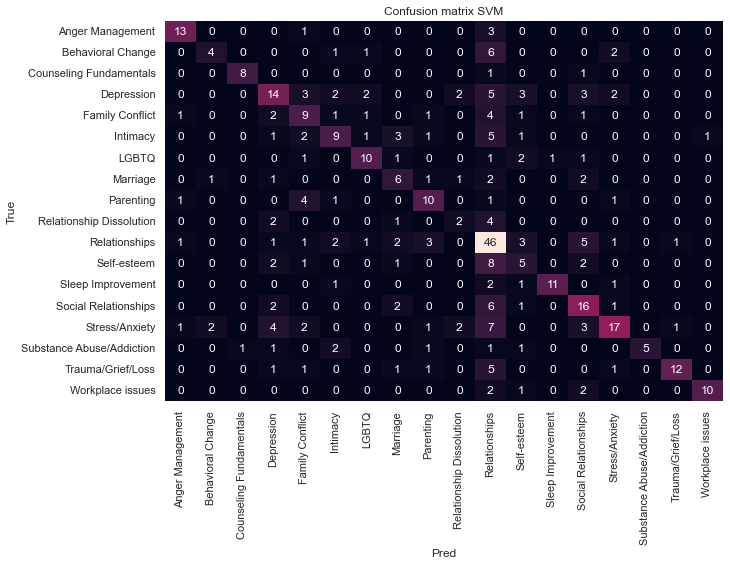

In [17]:
import seaborn as sns
cm=confusion_matrix(y_test,predictions_SVM)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=cls7, yticklabels=cls7, title="Confusion matrix SVM")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Downloading Pickle files

In [19]:
import pickle
pickle.dump(model_svm, open('model_svm.pkl', 'wb'))
pickle.dump(count_vect, open('count_vect_svm.pkl', 'wb'))
pickle.dump(transformer, open('transformer_svm.pkl', 'wb'))

# Other Models Tested

# GradientBoostingClassifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier                       
model_gbc = GradientBoostingClassifier(n_estimators=1000,
                                        max_features='auto', max_depth=4,
                                        random_state=1, verbose=1)

model_gbc.fit(x_train_tfidf, y_train)
y_pred_gbc = model_gbc.predict(x_test_tfidf)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

      Iter       Train Loss   Remaining Time 
         1           2.0428            3.67m
         2           1.8220            3.87m
         3           1.6496            3.87m
         4           1.5182            3.85m
         5           1.3913            4.11m
         6           1.2761            4.06m
         7           1.1859            4.02m
         8           1.1051            3.98m
         9           1.0293            3.93m
        10           0.9498            3.85m
        20           0.6384            3.58m
        30           0.4886            3.44m
        40           0.3890            3.39m
        50           0.3171            3.18m
        60           0.2625            3.28m
        70           0.2207            3.20m
        80           0.1864            3.14m
        90           0.1590            3.09m
       100           0.1367            3.08m
       200           0.0414            2.77m
       300           0.0186            2.35m
       40

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Anger Management'),
  Text(1.5, 0, 'Behavioral Change'),
  Text(2.5, 0, 'Counseling Fundamentals'),
  Text(3.5, 0, 'Depression'),
  Text(4.5, 0, 'Family Conflict'),
  Text(5.5, 0, 'Intimacy'),
  Text(6.5, 0, 'LGBTQ'),
  Text(7.5, 0, 'Marriage'),
  Text(8.5, 0, 'Parenting'),
  Text(9.5, 0, 'Relationship Dissolution'),
  Text(10.5, 0, 'Relationships'),
  Text(11.5, 0, 'Self-esteem'),
  Text(12.5, 0, 'Sleep Improvement'),
  Text(13.5, 0, 'Social Relationships'),
  Text(14.5, 0, 'Stress/Anxiety'),
  Text(15.5, 0, 'Substance Abuse/Addiction'),
  Text(16.5, 0, 'Trauma/Grief/Loss'),
  Text(17.5, 0, 'Workplace issues')])

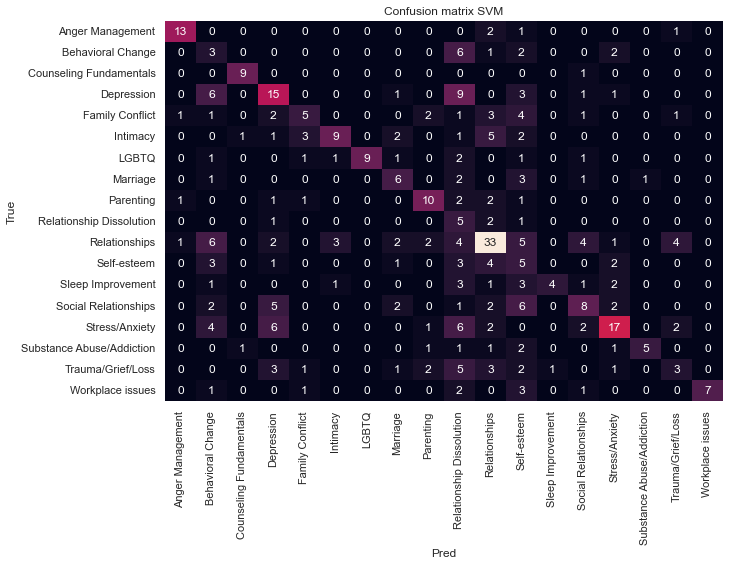

In [23]:
import seaborn as sns
cm=confusion_matrix(y_test, y_pred_gbc)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=cls7, yticklabels=cls7, title="GradientBoostingClassifier")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [25]:
scores_7 = cross_val_score(model_gbc, x_train_tfidf,y_train, cv=3)   #3 fold validation
print(accuracy_score(y_test,y_pred_gbc))
print ("Cross-validated scores:", scores_7)

      Iter       Train Loss   Remaining Time 
         1           1.9727            5.60m
         2           1.7235            5.73m
         3           1.5419            6.41m
         4           1.3877            6.30m
         5           1.2553            6.14m
         6           1.1294            6.06m
         7           1.0196            5.99m
         8           0.9260            5.88m
         9           0.8619            5.67m
        10           0.8136            5.53m
        20           0.5317            5.12m
        30           0.3844            5.13m
        40           0.2888            5.07m
        50           0.2234            5.02m
        60           0.1764            4.93m
        70           0.1414            4.81m
        80           0.1150            4.79m
        90           0.0947            4.73m
       100           0.0790            4.68m
       200           0.0205            4.21m
       300           0.0103            3.64m
       40

# Grid-Searching With Best Model -SVM

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.142 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.148 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.148 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.148 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.148 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.142 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.148 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.148 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.148 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.148 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.142 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.204 total time=   0.1s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.210 total time=   0.1s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.216 total time=   0.1s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.228 total time=   0.1s
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.370 total time=   0.1s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.358 total time=   0.1s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.389 total time=   0.1s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.451 total time=   0.1s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.383 total time=   0.1s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.1s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.346 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.377 total time=   0.1s
[CV 4/5] END .......C=10, ga

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.216 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.228 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.185 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.173 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.185 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.167 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.185 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.383 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.426 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.364 total time=   0.1s
[CV 1/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [27]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [28]:
grid_predictions = grid.predict(x_test_tfidf)
 
# print classification report
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.67      0.29      0.40        14
           2       0.89      0.80      0.84        10
           3       0.43      0.42      0.42        36
           4       0.39      0.43      0.41        21
           5       0.41      0.38      0.39        24
           6       0.62      0.59      0.61        17
           7       0.38      0.43      0.40        14
           8       0.59      0.56      0.57        18
           9       0.29      0.22      0.25         9
          10       0.43      0.73      0.54        67
          11       0.28      0.26      0.27        19
          12       0.91      0.62      0.74        16
          13       0.48      0.57      0.52        28
          14       0.62      0.50      0.56        40
          15       0.83      0.42      0.56        12
          16       1.00      0.36      0.53        22
          17       0.89    

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Anger Management'),
  Text(1.5, 0, 'Behavioral Change'),
  Text(2.5, 0, 'Counseling Fundamentals'),
  Text(3.5, 0, 'Depression'),
  Text(4.5, 0, 'Family Conflict'),
  Text(5.5, 0, 'Intimacy'),
  Text(6.5, 0, 'LGBTQ'),
  Text(7.5, 0, 'Marriage'),
  Text(8.5, 0, 'Parenting'),
  Text(9.5, 0, 'Relationship Dissolution'),
  Text(10.5, 0, 'Relationships'),
  Text(11.5, 0, 'Self-esteem'),
  Text(12.5, 0, 'Sleep Improvement'),
  Text(13.5, 0, 'Social Relationships'),
  Text(14.5, 0, 'Stress/Anxiety'),
  Text(15.5, 0, 'Substance Abuse/Addiction'),
  Text(16.5, 0, 'Trauma/Grief/Loss'),
  Text(17.5, 0, 'Workplace issues')])

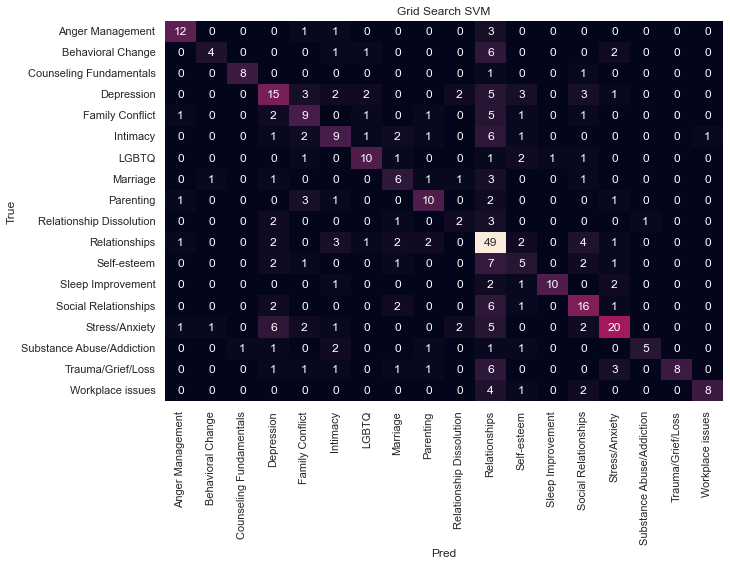

In [29]:
import seaborn as sns
cm=confusion_matrix(y_test, grid_predictions)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=cls7, yticklabels=cls7, title="Grid Search SVM")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Ensembling SVM with AdaBoosters

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
model_13= AdaBoostClassifier(SGDClassifier(loss='hinge'), algorithm='SAMME', learning_rate=0.5, n_estimators=300)
model_13.fit(x_train_tfidf, y_train)                                                   
y_pred13 = model_13.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred13))
print(classification_report(y_test, y_pred13))

0.3358395989974937
              precision    recall  f1-score   support

           0       0.88      0.41      0.56        17
           1       0.75      0.21      0.33        14
           2       1.00      0.20      0.33        10
           3       0.48      0.31      0.37        36
           4       0.29      0.19      0.23        21
           5       0.86      0.25      0.39        24
           6       1.00      0.35      0.52        17
           7       0.80      0.29      0.42        14
           8       1.00      0.22      0.36        18
           9       0.04      0.44      0.08         9
          10       0.57      0.58      0.57        67
          11       0.08      0.53      0.14        19
          12       1.00      0.38      0.55        16
          13       0.38      0.18      0.24        28
          14       0.76      0.33      0.46        40
          15       1.00      0.42      0.59        12
          16       1.00      0.18      0.31        22
        

In [34]:
scores_13 = cross_val_score(model_13, x_train_tfidf,y_train, cv=3)   #3 fold validation
print(accuracy_score(y_test,y_pred13))
print ("Cross-validated scores:", scores_13)

0.3358395989974937
Cross-validated scores: [0.15555556 0.11111111 0.16296296]


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Anger Management'),
  Text(1.5, 0, 'Behavioral Change'),
  Text(2.5, 0, 'Counseling Fundamentals'),
  Text(3.5, 0, 'Depression'),
  Text(4.5, 0, 'Family Conflict'),
  Text(5.5, 0, 'Intimacy'),
  Text(6.5, 0, 'LGBTQ'),
  Text(7.5, 0, 'Marriage'),
  Text(8.5, 0, 'Parenting'),
  Text(9.5, 0, 'Relationship Dissolution'),
  Text(10.5, 0, 'Relationships'),
  Text(11.5, 0, 'Self-esteem'),
  Text(12.5, 0, 'Sleep Improvement'),
  Text(13.5, 0, 'Social Relationships'),
  Text(14.5, 0, 'Stress/Anxiety'),
  Text(15.5, 0, 'Substance Abuse/Addiction'),
  Text(16.5, 0, 'Trauma/Grief/Loss'),
  Text(17.5, 0, 'Workplace issues')])

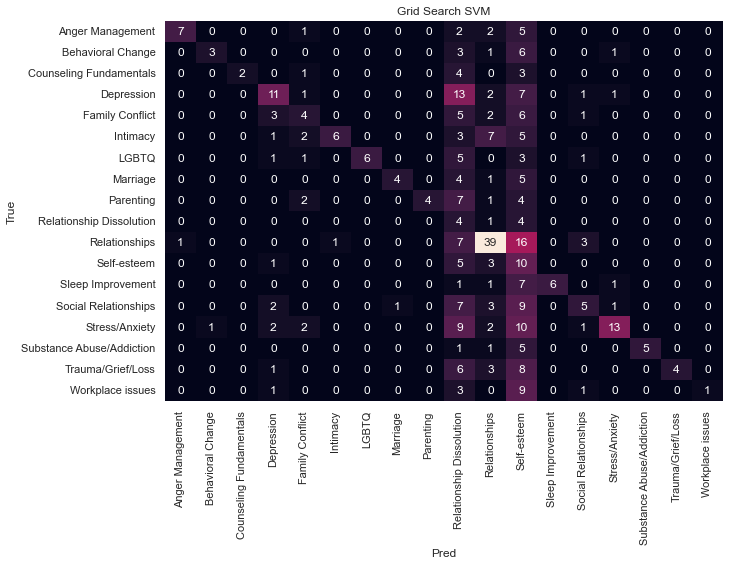

In [35]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred13)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=cls7, yticklabels=cls7, title="Boosted SVM")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# LSTM

In [41]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model


In [58]:
X = df['cleanmsg']
y = df['topic_encoding']

# Split data into train , test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
print('Shape of X_train : ' , X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (967,)
Shape of y_train :  (967,)
Shape of X_test :  (242,)
Shape of y_test :  (242,)


In [60]:
y_train = to_categorical(y_train,dtype ="uint8")
y_test  = to_categorical(y_test,dtype ="uint8")

In [61]:
df["len_msg"] = df["cleanmsg"].str.len()

C:\Users\GARLAP~1.VAR\AppData\Local\Temp/ipykernel_5324/1707422324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_msg"] = df["cleanmsg"].str.len()


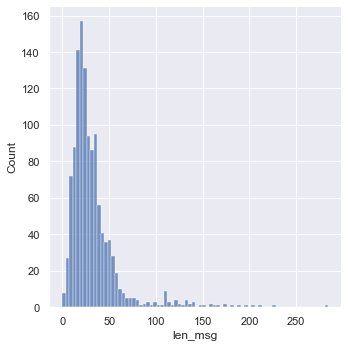

In [49]:
data = df['len_msg']

# Generate histogram/distribution plot
sns.displot(data)

plt.show()

In [62]:
# Tokenize Texts
max_features = 9000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

In [63]:
# convert tokenized texts into same padding size
maxlen = 80
embed_size = 128 
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [72]:
# Create Model  
inp = Input(shape=(maxlen, )) 
x   =  Embedding(max_features, embed_size)(inp)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(18, activation="softmax")(x)

In [76]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 80)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 80, 128)           1152000   
                                                                 
 lstm_layer (LSTM)           (None, 80, 60)            45360     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 64)                3904      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                           

In [77]:
model.fit(X_train_final,y_train, epochs=15,validation_data=(X_test_final,y_test))

Epoch 1/15
31/31 [==============================] - 5s 82ms/step - loss: 0.2545 - accuracy: 0.9473 - val_loss: 2.8174 - val_accuracy: 0.4298
Epoch 2/15
31/31 [==============================] - 2s 74ms/step - loss: 0.2057 - accuracy: 0.9607 - val_loss: 2.9173 - val_accuracy: 0.4008
Epoch 3/15
31/31 [==============================] - 2s 67ms/step - loss: 0.1737 - accuracy: 0.9659 - val_loss: 2.9459 - val_accuracy: 0.4050
Epoch 4/15
31/31 [==============================] - 2s 71ms/step - loss: 0.1589 - accuracy: 0.9617 - val_loss: 3.1394 - val_accuracy: 0.3843
Epoch 5/15
31/31 [==============================] - 3s 86ms/step - loss: 0.1402 - accuracy: 0.9700 - val_loss: 3.1050 - val_accuracy: 0.3843
Epoch 6/15
31/31 [==============================] - 3s 96ms/step - loss: 0.1193 - accuracy: 0.9793 - val_loss: 3.2439 - val_accuracy: 0.3884
Epoch 7/15
31/31 [==============================] - 2s 71ms/step - loss: 0.1082 - accuracy: 0.9772 - val_loss: 3.3477 - val_accuracy: 0.3843
Epoch 8/15
31

In [78]:
model.evaluate(X_test_final,y_test)

8/8 [==============================] - 0s 19ms/step - loss: 3.7785 - accuracy: 0.4174


[3.7784667015075684, 0.41735535860061646]

In [81]:
import numpy as np
lstm_pred = np.round(model.predict(X_test_final))

In [85]:
# Precision , Recall , F1-score
cr = classification_report(y_test,lstm_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.33      0.12      0.18         8
           2       1.00      0.67      0.80         6
           3       0.67      0.38      0.49        26
           4       0.39      0.44      0.41        16
           5       0.33      0.32      0.32        19
           6       0.86      0.75      0.80         8
           7       0.00      0.00      0.00        10
           8       0.46      0.40      0.43        15
           9       0.25      0.33      0.29         6
          10       0.52      0.42      0.47        33
          11       0.14      0.29      0.19         7
          12       0.33      0.33      0.33         6
          13       0.50      0.33      0.40        15
          14       0.35      0.41      0.38        17
          15       0.67      0.80      0.73        10
          16       0.50      0.38      0.43        13
          17       0.33    

C:\Users\Garlapati.Varun\chatbot\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing Model Prediction

In [106]:
complaint=[]
for index in x_test.index:
    query=df.loc[df.index[index]]
    complaint.append(query)

In [107]:
complaint

[types                                 Substance Abuse/Addiction
 complaints    I over endulge when I drink alcohol and feel e...
 Commnet                                                     NaN
 Name: 109, dtype: object,
 types                                                     LGBTQ
 complaints    Why does my husband like dressing as a female ...
 Commnet                                                     NaN
 Name: 464, dtype: object,
 types                                                     LGBTQ
 complaints    What does it mean that I feel like different g...
 Commnet                                                     NaN
 Name: 332, dtype: object,
 types                                           Family Conflict
 complaints    My husband is harsh towards our son and threat...
 Commnet                                                     NaN
 Name: 117, dtype: object,
 types                                                 Parenting
 complaints    How do I kick my stepdaughter ou

In [108]:
cdf=pd.DataFrame(complaint)

In [118]:
cdf['true label']=y_test
cdf['predict label']=predict_label

In [116]:
predict_label=[]
for i in predictions_SVM:
    a=cls7[i]
    print(a,i)
    predict_label.append(a)

Substance Abuse/Addiction 15
LGBTQ 6
Marriage 7
Family Conflict 4
Family Conflict 4
Relationships 10
Depression 3
Relationships 10
Intimacy 5
Social Relationships 13
Counseling Fundamentals 2
LGBTQ 6
Stress/Anxiety 14
Anger Management 0
Anger Management 0
Social Relationships 13
Depression 3
Social Relationships 13
Intimacy 5
Depression 3
Stress/Anxiety 14
Anger Management 0
Sleep Improvement 12
Self-esteem 11
Stress/Anxiety 14
Relationships 10
Social Relationships 13
Social Relationships 13
Parenting 8
Social Relationships 13
Social Relationships 13
Intimacy 5
Relationship Dissolution 9
LGBTQ 6
Self-esteem 11
Workplace issues 17
Depression 3
Relationships 10
Relationships 10
LGBTQ 6
Social Relationships 13
Relationships 10
Counseling Fundamentals 2
Relationships 10
Stress/Anxiety 14
Family Conflict 4
Substance Abuse/Addiction 15
Parenting 8
Family Conflict 4
Trauma/Grief/Loss 16
Family Conflict 4
Stress/Anxiety 14
Relationship Dissolution 9
Relationships 10
Family Conflict 4
Intimacy 

In [119]:
cdf

types  \
109   Substance Abuse/Addiction   
464                       LGBTQ   
332                       LGBTQ   
117             Family Conflict   
1061                  Parenting   
...                         ...   
879     Counseling Fundamentals   
349               Relationships   
998        Social Relationships   
340            Workplace issues   
673     Counseling Fundamentals   

                                             complaints  Commnet  true label  \
109   I over endulge when I drink alcohol and feel e...      NaN          15   
464   Why does my husband like dressing as a female ...      NaN           6   
332   What does it mean that I feel like different g...      NaN           6   
117   My husband is harsh towards our son and threat...      NaN           4   
1061  How do I kick my stepdaughter out of our house...      NaN           8   
...                                                 ...      ...         ...   
879   How do I approach my doctor about seeing a the...      NaN           2   
349   How do I help my 20 year old boyfriend who say...      NaN          10   
998   I was Ã¢â‚¬Å“mentoredÃ¢â‚¬Â by this guy for a...      NaN          13   
340                            I'm attracted to my boss      NaN          17   
673   How do I find a therapist for my family as a m...      NaN           2   

                  predict label  
109   Substance Abuse/Addiction  
464                       LGBTQ  
332                    Marriage  
117             Family Conflict  
1061            Family Conflict  
...                         ...  
879     Counseling Fundamentals  
349                   Parenting  
998              Stress/Anxiety  
340            Workplace issues  
673     Counseling Fundamentals  

[399 rows x 5 columns]

In [120]:
cdf.to_csv(r'svm_Mentalhealth.csv')

In [57]:
import os
os.chdir(r'./')
from IPython.display import FileLink
FileLink(r'svm_Mentalhealth.csv')

/kaggle/working/svm_Mentalhealth.csv

## WORD CLOUDS


In [11]:
import pandas as pd
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder,TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt 
from nltk.stem import WordNetLemmatizer 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist, pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer

In [60]:
df.head()

types                                         complaints  \
0     Stress/Anxiety      How do I overcome my anxierty and depression?   
2           Marriage  I'm going through depression right now and my ...   
3     Stress/Anxiety  How do I talk to my girlfriend about my anxiet...   
4    Family Conflict       My fiancÃ©'s ex-husband shows up unannounced   
5  Behavioral Change    How do I stop sneaking away from home at night?   

   Commnet  
0      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN

In [64]:
for cate in cls7:
    print('subclass: ',cate)
    words=[]
    for i in df[df['types']==cate].index:
        try:
            temp_words = word_tokenize(df[df['types']==cate]['cleanmsg'][i])
            for word in temp_words:
                if( not word.lower() in stop_words):
                    words.append(word.lower())
        except:
            print(df[df['types']==cate]['cleanmsg'][i])
    lemmatizer = WordNetLemmatizer()
    words1 = [lemmatizer.lemmatize(item) for item in words]
    print(FreqDist(words1).most_common(50))
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

subclass:  Anger Management
[('anger', 25), ('angry', 14), ('thing', 10), ('time', 8), ('feel', 8), ('mad', 7), ('violent', 7), ('control', 6), ('want', 5), ('need', 5), ('make', 5), ('start', 5), ('really', 5), ('thought', 4), ('easily', 4), ('temper', 4), ('even', 4), ('something', 4), ('son', 3), ('face', 3), ('argument', 3), ('problem', 3), ('constantly', 3), ('family', 3), ('upset', 3), ('say', 3), ('take', 3), ('stay', 3), ('day', 3), ('rage', 3), ('feeling', 3), ('people', 3), ('happy', 2), ('help', 2), ('deal', 2), ('dream', 2), ('issue', 2), ('extremely', 2), ('manage', 2), ('boyfriend', 2), ('hit', 2), ('random', 2), ('spurt', 2), ('stop', 2), ('person', 2), ('hurt', 2), ('never', 2), ('lose', 2), ('point', 2), ('use', 2)]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
subclass:  Behavioral Change
[('disorder', 5), ('feel', 5), ('mood', 4), ('bipolar', 4), ('think', 4), ('stop', 3), ('away', 3), ('anxiety', 3), ('swing', 3), ('control', 3), ('ocd', 2), ('boyfriend', 2), ('

In [65]:
def word_cloud_fn(word_list):
    lemmatizer = WordNetLemmatizer()
    words1 = [lemmatizer.lemmatize(item) for item in words]
    wordcloud = WordCloud(width = 800, height = 800, 
                            collocations=False,
                            background_color ='white', 
                            stopwords = stop_words,
                            max_words = 200,
                            min_font_size = 10).generate(str(words1)[1:-1].replace(',','').replace("'","") )

    # plot the WordCloud image                        
    plt.figure(figsize = (6,6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

subclass:  Anger Management


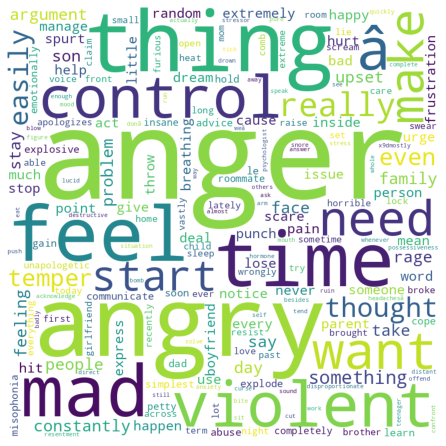

subclass:  Behavioral Change


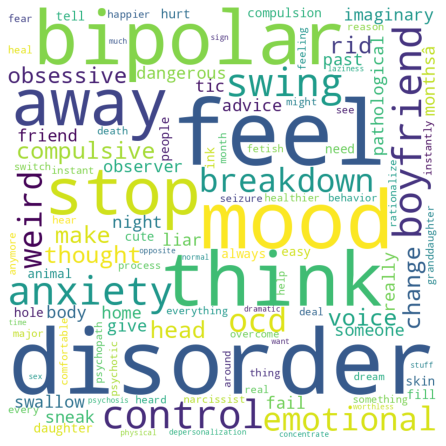

subclass:  Counseling Fundamentals


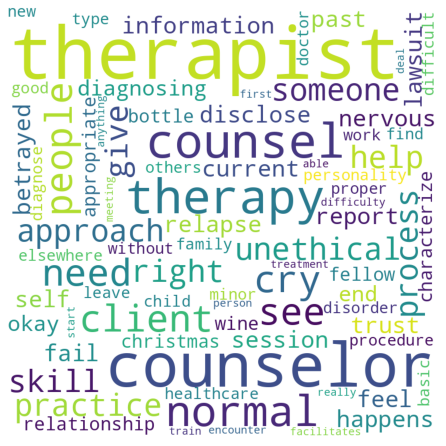

subclass:  Depression


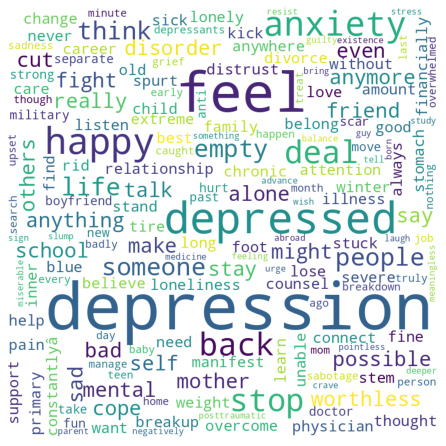

subclass:  Family Conflict


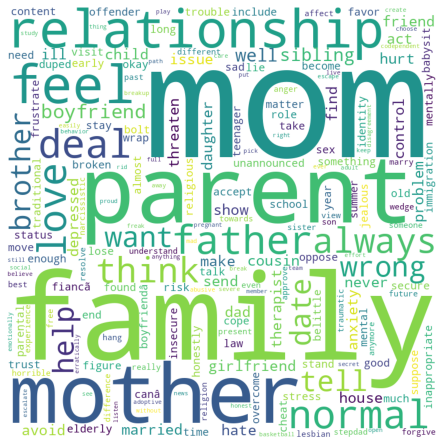

subclass:  Intimacy


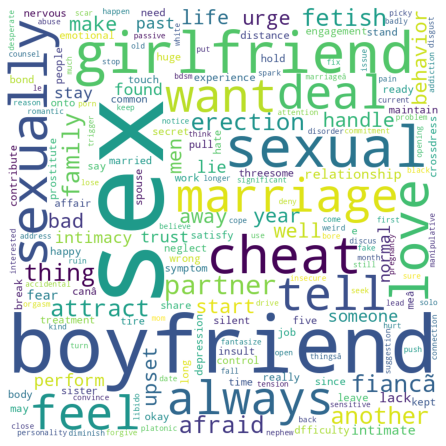

subclass:  LGBTQ


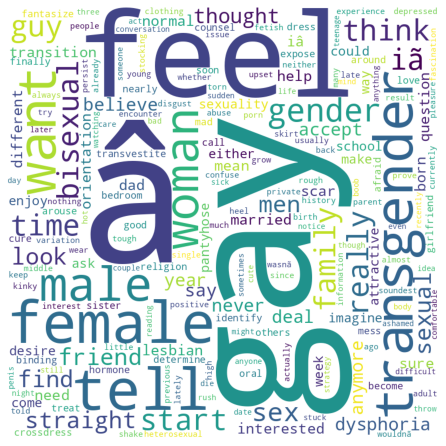

subclass:  Legal & Regulatory


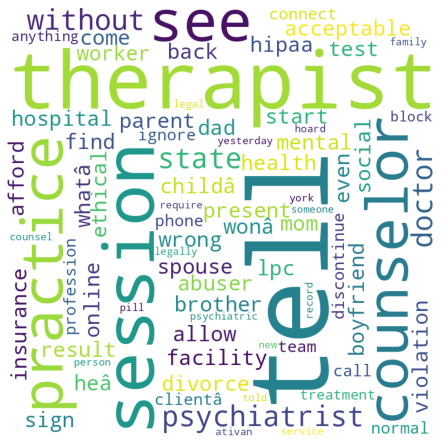

subclass:  Marriage


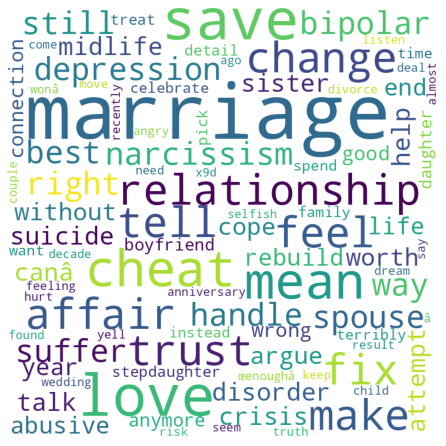

subclass:  Parenting


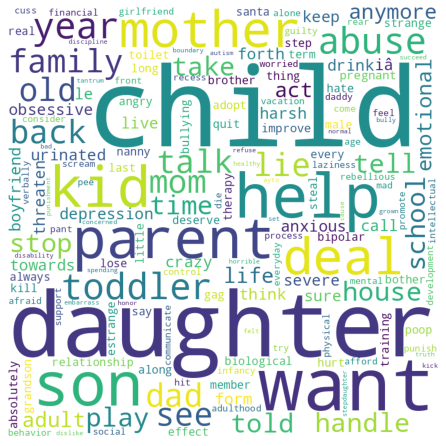

subclass:  Relationship Dissolution


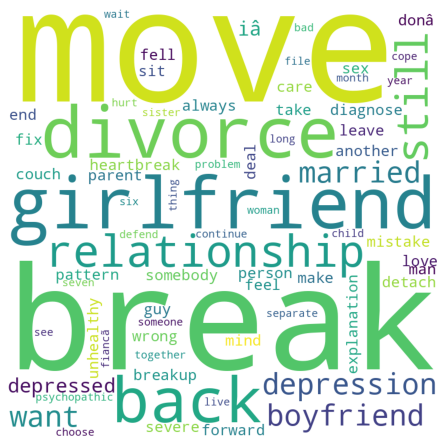

subclass:  Relationships


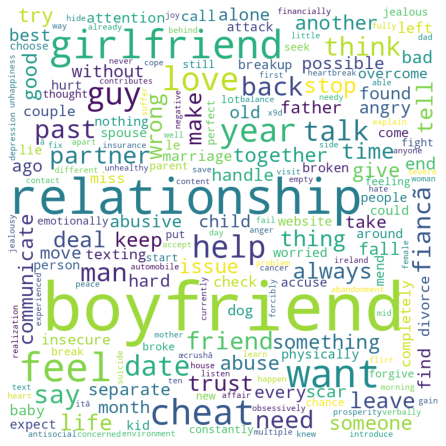

subclass:  Self-esteem


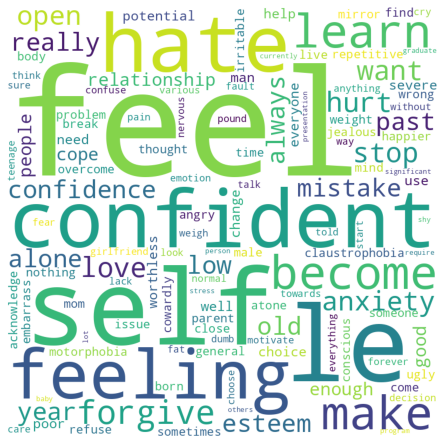

subclass:  Sleep Improvement


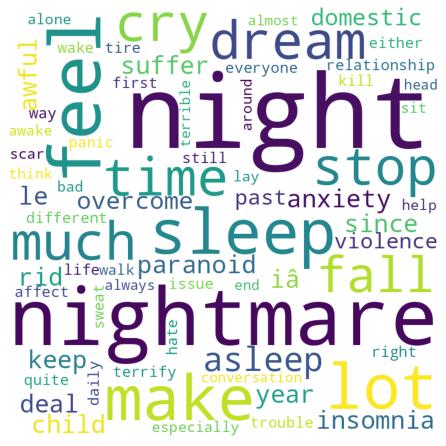

subclass:  Social Relationships


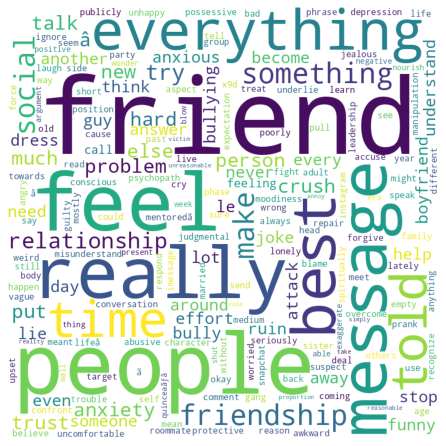

subclass:  Stress/Anxiety


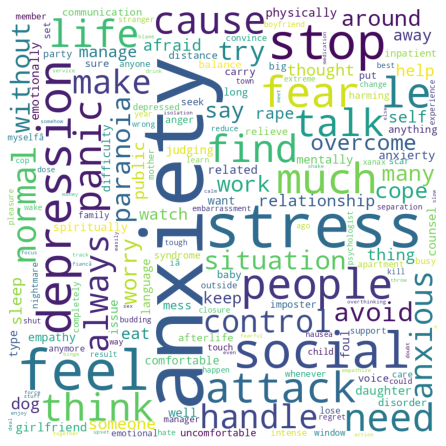

subclass:  Substance Abuse/Addiction


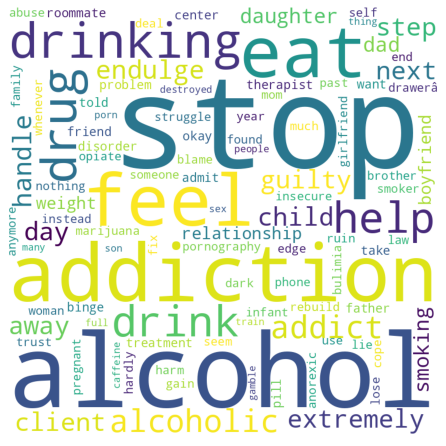

subclass:  Trauma/Grief/Loss


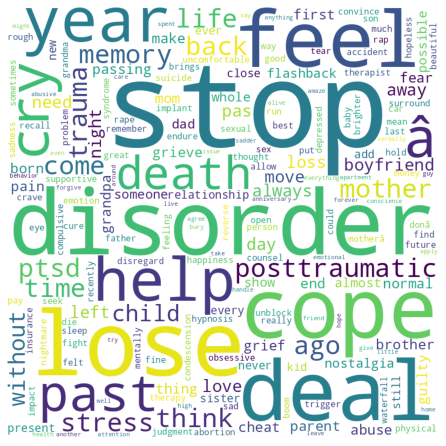

subclass:  Workplace issues


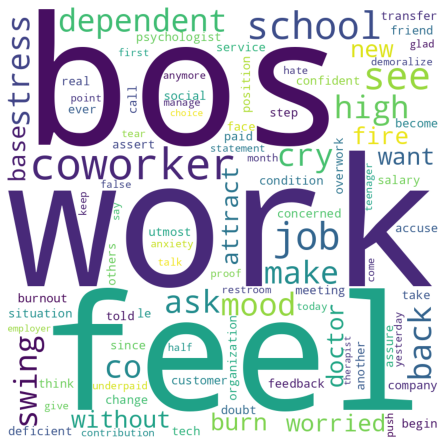

In [66]:
for cate in cls7:
    print('subclass: ',cate)
    words=[]
    for i in df[df['types']==cate].index:
        try:
            temp_words = word_tokenize(df[df['types']==cate]['cleanmsg'][i])
            for word in temp_words:
                if( not word.lower() in stop_words):
                    words.append(word.lower())
        except:
            print(df[df['types']==cate]['cleanmsg'][i])
    word_cloud_fn(words)